In [ ]:
# Part 1: Find a parsimonious model that predicts insurance charges and interpret the coefficients

In [40]:
# Import the necessary libraries and load the dataset into a Pandas DataFrame
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/kiki/Desktop/Charges excel.csv")
print(data)

       ID  Age    BMI  Plan     Sex Smoke       Income       Charges  \
0       1   59  26.97     2    male     N   77965.0000  126966.77430   
1       2   68  26.48     1  female     N   61048.0000  118915.98420   
2       3   73  25.59     2  female     N   42460.0000  108496.42450   
3       4   61  33.69     1    male     Y   84107.0000  302738.52230   
4       5   79  25.15     3    male     Y  136426.4714  129749.95000   
..    ...  ...    ...   ...     ...   ...          ...           ...   
995   996   62  36.80     3  female     N  106998.8477  155753.80620   
996   997   74  30.20     1    male     N   47930.0000   74471.99771   
997   998   54  18.92     1    male     N  117126.0000  125399.21440   
998   999   59  26.12     1  female     Y   86768.0000   95440.48555   
999  1000   59  25.73     1  female     Y   86896.0000   81247.80253   

     Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11  Unnamed: 12  
0           NaN         NaN          NaN         NaN          NaN  

In [22]:
# Create dummy variables for the categorical variables (Plan, Smoke, Sex) using the get_dummies() function in Pandas
plan_dummies = pd.get_dummies(df['Plan'], prefix='Plan')
smoke_dummies = pd.get_dummies(df['Smoke'], prefix='Smoke')
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')

# Add dummy variables to the DataFrame
data = pd.concat([df, plan_dummies, smoke_dummies, sex_dummies], axis=1)

In [24]:
# Select the variables we want to use in the model (Age, BMI, Income, and the dummy variables for Plan, Smoke, and Sex)
X = data[['Age', 'BMI', 'Income', 'Plan_1', 'Plan_2', 'Plan_3', 'Smoke_N', 'Smoke_Y', 'Sex_female', 'Sex_male']]
y = data['Charges']

# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Linear Regression Model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     33.07
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           9.52e-40
Time:                        00:48:57   Log-Likelihood:                -8439.7
No. Observations:                 700   AIC:                         1.690e+04
Df Residuals:                     692   BIC:                         1.693e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6977.4117   1.01e+04     -0.693      0.4

In [5]:
# p-value less than 0.05 (Age, BMI, and Smoke_N) means that variables have a significant impact on medical charges 

In [26]:
# Build a parsimonious model using just those variables:
X_train_p = X_train[['const', 'Age', 'BMI', 'Smoke_N']]
model_p = sm.OLS(y_train, X_train_p).fit()
print(model_p.summary())

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     73.75
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.99e-41
Time:                        00:49:06   Log-Likelihood:                -8444.1
No. Observations:                 700   AIC:                         1.690e+04
Df Residuals:                     696   BIC:                         1.691e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.009e+04   1.52e+04      1.976      0.0

In [7]:
# Part 2: Test for differences in charges across the different BMI categories for smokers and nonsmokers using a formal hypothesis test.

In [ ]:
# Both ANOVA and t-test are implemented:

In [ ]:
# AVOVA:

In [27]:
# Create smoker variable
data['smoker'] = data['Smoke'].map({'N': 0, 'Y': 1})

In [ ]:
# Next, create a new variable that categorizes individuals into BMI categories in following cutoffs:
# Underweight: BMI < 18.5
# Normal: 18.5 <= BMI < 25
# Overweight: 25 <= BMI < 30
# Obese: BMI >= 30

In [28]:
# Create BMI category variable
data.loc[data['BMI'] < 18.5, 'BMI_cat'] = 'underweight'
data.loc[(data['BMI'] >= 18.5) & (data['BMI'] < 25), 'BMI_cat'] = 'normal'
data.loc[(data['BMI'] >= 25) & (data['BMI'] < 30), 'BMI_cat'] = 'overweight'
data.loc[data['BMI'] >= 30, 'BMI_cat'] = 'obese

In [29]:
# Run ANOVA test on the charges with BMI category and smoker status as independent variables
model = ols('Charges ~ BMI_cat*smoker', data=data).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)

                      sum_sq     df           F         PR(>F)
BMI_cat         4.453509e+11    3.0  270.905039  2.084093e-128
smoker          4.452444e+11    1.0  812.520701  4.904664e-131
BMI_cat:smoker  1.307416e+12    3.0  795.295706  2.437877e-263
Residual        5.435953e+11  992.0         NaN            NaN


In [ ]:
# Results of ANOVA:
# The ANOVA results show that both BMI category and smoker status have a significant effect on the medical charges. 
# The interaction between BMI category and smoker status also has a significant effect on the medical charges. 
# The p-values for all three variables are very small, which indicates that the null hypothesis of no effect can be rejected for all three variables.
# Additionally, the F-statistics for both BMI category and smoker status are large, which further indicates that the effect of these variables on medical charges is significant. 
# The F-statistic for the interaction term between BMI category and smoker status is even larger, which suggests that the effect of the interaction term on medical charges is even more significant than the effects of either variable alone.

In [36]:
# Implement a t-test:
# 1. Define the null hypothesis: The null hypothesis is that there is no difference in the mean charges between smokers and non-smokers within each BMI category.

# 2. Define the alternative hypothesis: The alternative hypothesis is that there is a difference in the mean charges between smokers and non-smokers within each BMI category.

# 3. Set the significance level: Let's use a significance level of 0.05.

# 4. Conduct the t-test:

# separate smokers and non-smokers
smokers = data[data['Smoke'] == 'Y']
non_smokers = data[data['Smoke'] == 'N']

# perform t-test for each BMI category
for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
    print(f"Results for {category} BMI category:")
    ttest = stats.ttest_ind(smokers[smokers['BMI_Category'] == category]['Charges'], 
                            non_smokers[non_smokers['BMI_Category'] == category]['Charges'], 
                            equal_var = False)
    print("t-statistic: {:.3f}, p-value: {:.4f}".format(ttest.statistic, ttest.pvalue))

Results for Underweight BMI category:
t-statistic: -0.069, p-value: 0.9470
Results for Normal BMI category:
t-statistic: 0.598, p-value: 0.5507
Results for Overweight BMI category:
t-statistic: -0.284, p-value: 0.7772
Results for Obese BMI category:
t-statistic: 33.102, p-value: 0.0000


In [ ]:
# Results of t-test:
# For the Underweight BMI category, the t-statistic is -0.069 and the p-value is 0.9470, indicating that there is no significant difference between the mean charges for smokers and nonsmokers in this category.
# For the Normal BMI category, the t-statistic is 0.598 and the p-value is 0.5507, indicating that there is no significant difference between the mean charges for smokers and nonsmokers in this category.
# For the Overweight BMI category, the t-statistic is -0.284 and the p-value is 0.7772, indicating that there is no significant difference between the mean charges for smokers and nonsmokers in this category.
# For the Obese BMI category, the t-statistic is 33.102 and the p-value is 0.0000, indicating that there is a statistically significant difference between the mean charges for smokers and nonsmokers in this category. The large t-statistic and the very small p-value suggest that the difference between the mean charges for smokers and nonsmokers in the Obese BMI category is not likely due to chance, and that the mean charges for smokers are significantly different from the mean charges for nonsmokers in this category.

In [ ]:
# Part 3: Test income differences across the different insurance plans

In [37]:
# Create subsets of data for each insurance plan
plan1 = df[df['Plan'] == 1]
plan2 = df[df['Plan'] == 2]
plan3 = df[df['Plan'] == 3]

In [38]:
# Run ANOVA test to compare the means of the income variable across the three insurance plans
f_stat, p_value = stats.f_oneway(plan1['Income'], plan2['Income'], plan3['Income'])

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 328.12467385011246
p-value: 3.22005987464418e-110


In [39]:
#Interpret the results of the ANOVA test
if p_value < 0.05:
    print("Reject null hypothesis. There is a significant difference in income across the different insurance plans.")
else:
    print("Fail to reject null hypothesis. There is not enough evidence to conclude a significant difference in income across the different insurance plans.")

Reject null hypothesis. There is a statistically significant difference in income across the different insurance plans.


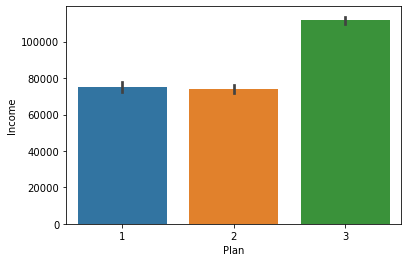

In [44]:
# Visualizing the Differences in Income for Different Insurance Plans
# Create a barplot to visualize the mean income for each insurance plan
sns.barplot(x='Plan', y='Income', data=df)
plt.show()

In [ ]:
# Possible Visualization:

In [ ]:
# 1. What are the most significant factors affecting medical charges?

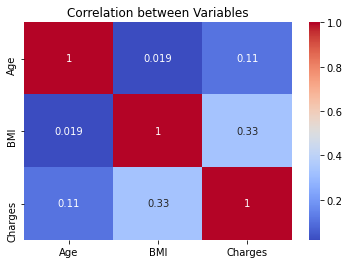

In [46]:
# Create a heatmap to visualize the correlation between variables
sns.heatmap(data=df[['Age', 'BMI', 'Smoke', 'Charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Variables')
plt.show()

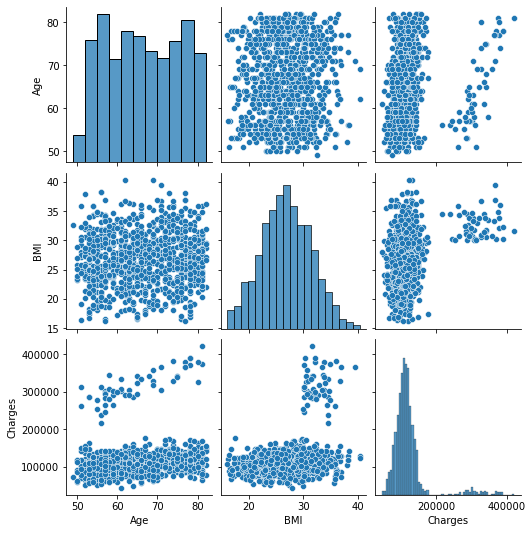

In [47]:
# Create a pairplot to visualize the relationship between variables
sns.pairplot(data=df[['Age', 'BMI', 'Smoke', 'Charges']])
plt.show()

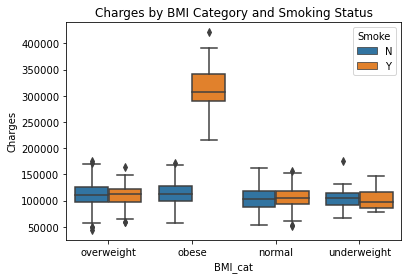

In [49]:
# Create boxplots to compare charges across different categories
sns.boxplot(x='BMI_cat', y='Charges', hue='Smoke', data=df)
plt.title('Charges by BMI Category and Smoking Status')
plt.show()

In [ ]:
Question # 2.Is there a significant difference in charges between smokers and non-smokers, and between different BMI categories?

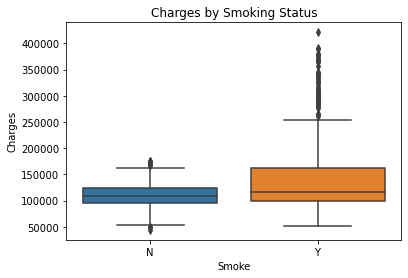

In [51]:
# Create boxplots to compare charges between smokers and non-smokers
sns.boxplot(x='Smoke', y='Charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()

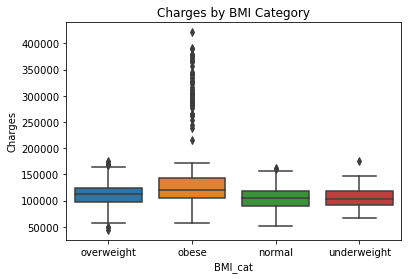

In [52]:
# Create boxplots to compare charges across different BMI categories
sns.boxplot(x='BMI_cat', y='Charges', data=df)
plt.title('Charges by BMI Category')
plt.show()

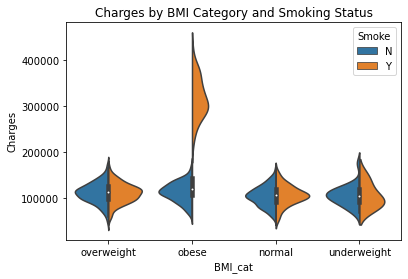

In [64]:
# Create a violin plot to compare charges across different BMI categories and smoking status
sns.violinplot(x='BMI_cat', y='Charges', hue='Smoke', data=df, split=True)
plt.title('Charges by BMI Category and Smoking Status')
plt.show()

In [55]:
# 3. Are charges for smokers with high BMI significantly different from charges for non-smokers with low BMI?

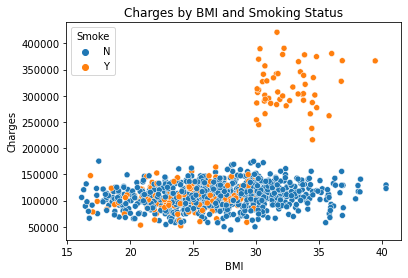

In [57]:
# Create a scatter plot to visualize the relationship between BMI and charges
sns.scatterplot(x='BMI', y='Charges', hue='Smoke', data=df)
plt.title('Charges by BMI and Smoking Status')
plt.show()

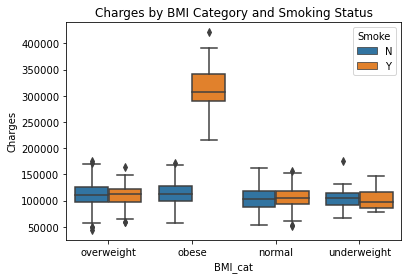

In [59]:
# Create boxplots to compare charges between four different groups based on BMI and smoking status
sns.boxplot(x='BMI_cat', y='Charges', hue='Smoke', data=df)
plt.title('Charges by BMI Category and Smoking Status')
plt.show()

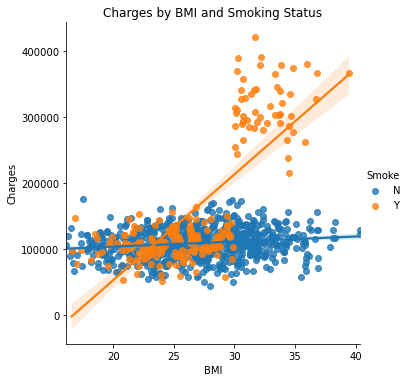

In [61]:
# Create a regression plot to visualize the relationship between charges, BMI, and smoking status
sns.lmplot(x='BMI', y='Charges', hue='Smoke', data=df)
plt.title('Charges by BMI and Smoking Status')
plt.show()